# . Introduction:

Video games are a billion-dollar business and have been for many years. 

There are quite few assumptions that may or may not be true regarding the factors influencing the Global sales of the video games like they are dependant on the Platforms they are sold on or the genre they belong to .. so on!

Now in my data analysis report I am going to analyse an open source dataset try to figure out what are the factors that really influence the video games business market.

In [1]:
# Importing required libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# reading the csv file to 'df' dataframe
df = pd.read_csv('/datasets/games.csv')
df.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# checking for the misisng values in 'df'
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [4]:
# checking for the duplicates in 'df'
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [7]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [8]:
df['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [9]:
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [10]:
df['User_Score'].value_counts().head(10)

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.9       2
2.3       2
9.6       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

In [11]:
df['User_Score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: User_Score, dtype: object

In [12]:
df['Critic_Score'].value_counts().head(10)

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

In [13]:
df['Critic_Score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

## . Conclusion :

The give data set represents all the data about video games, it's sales, ratings etc. 

1. The data set comprises of 16715 rows × 11 columns.

2. Out of these there are several missing values in the 'Critc_Score', 'User_Score' and 'Rating' for about more than 6700 values. Where as columns like 'year_of_release','Name' and 'Genre' has few missing values.

3. No duplicate values were detected.

4. The maximum values in the 'User_Score' column are 'tbd', lets deal with it in further analysis.

5. The minimum critic score is 13.0 where as the highest appears to be 98.0.

# . Preparing data for analysis:

In [14]:
# converting column names to lower case to avoid errors
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [16]:
# dropping the missing values in the corresponding columns
df = df.dropna(subset=['name','year_of_release'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [18]:
# filling in the missing values in 'rating' column with mode 
df['rating'] = df.groupby('genre')['rating'].apply(lambda x: x.fillna(x.mode().iloc[0]))
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

I have filled in the missing values in the 'rating' column using mode value obtained from grouping by the 'genre' column because, generally the esrb ratings are given as E-everyone, M- mature and so on... 

Types of Genres are one of the direct criteria for giving a rating to a game . Therefore I've decided to fill in the missing values based on the most common values among the ratings based on their genre.

In [19]:
# replacing the missing values with null values
df['user_score'] = df['user_score'].replace({'tbd': np.NaN})
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Coming to the missing values in the user score column there are several missing values out of which most of them are 'tbd' values , but there is not much information to determine these values so I just replaced these values with null values so that it doesn't come in our way during the analysis.

In [20]:
# converting year of release to integer
df['year_of_release'] = df['year_of_release'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null object
rating             16444 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [21]:
# converting 'user_score' values to float64
df['user_score'] = df['user_score'].astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [23]:
import warnings
warnings.filterwarnings("ignore")
# calculating global sales for all the games
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df_sales = df.groupby('name')['total_sales'].agg({'total_sales':'sum'})
df_sales.head(10)

,total_sales
name,
Beyblade Burst,0.03
Fire Emblem Fates,1.67
Frozen: Olaf's Quest,1.10
Haikyu!! Cross Team Match!,0.04
Tales of Xillia 2,0.84
...,...
thinkSMART FAMILY!,0.03
thinkSMART: Chess for Kids,0.01
uDraw Studio,2.42


In [24]:
# renaming the column
df_sales = df_sales.rename(columns={'total_sales':'sales_per_game'})
df_sales.head(10)

,sales_per_game
name,
Beyblade Burst,0.03
Fire Emblem Fates,1.67
Frozen: Olaf's Quest,1.10
Haikyu!! Cross Team Match!,0.04
Tales of Xillia 2,0.84
...,...
thinkSMART FAMILY!,0.03
thinkSMART: Chess for Kids,0.01
uDraw Studio,2.42


In [25]:
from functools import reduce
dataframe = [df_sales,df]
df = reduce(lambda  left,right: pd.merge(left,right,on=['name'],
                                            how='outer'), dataframe)
df.head(10)


,name,sales_per_game,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Beyblade Burst,0.03,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,T,0.03
1,Fire Emblem Fates,1.67,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,T,1.67
2,Frozen: Olaf's Quest,1.10,3DS,2013,Platform,0.27,0.27,0.00,0.05,NaN,NaN,E,0.59
3,Frozen: Olaf's Quest,1.10,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,E,0.51
4,Haikyu!! Cross Team Match!,0.04,3DS,2016,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,E,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16439,thinkSMART: Chess for Kids,0.01,DS,2011,Misc,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16440,uDraw Studio,2.42,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,NaN,E,2.42
16441,uDraw Studio: Instant Artist,0.19,Wii,2011,Misc,0.06,0.09,0.00,0.02,NaN,NaN,E,0.17
16442,uDraw Studio: Instant Artist,0.19,X360,2011,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E,0.02


## .Conclusion: 

There are few misisng values in the columns such as name, year of release, critic score, user score and rating which have been dealt as stated below :

1. There we only 2 missing values in names column and 269 missing values in the year of release column, as they constitute less than 2 % of the data available it's better to just drop it.

2. Then I filled up the missing values in the rating column with the mode values that are obtained by grouping the most common rating for each genre, because mostly the rating is dependent on genre.

3. There is absolutely no way to fill up the missing values in the critc score with the data in the dataset so I just left the null values in it's place. 

4. Coming to the missing values in the user score column there are several missing values out of which most of them are 'tbd' values , but there is not much information to determine these values so I just replaced these values with null values so that it doesn't come in our way during the analysis.

# . Analyzing the data :

## Total games released per year:

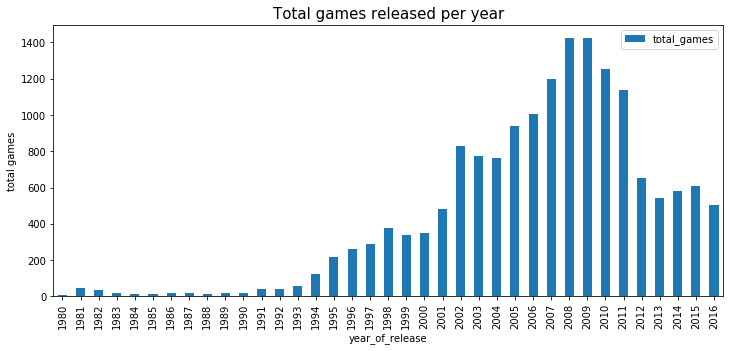

In [26]:
import warnings
warnings.filterwarnings("ignore")
# calculating total games per year
df_year = df.groupby('year_of_release')['name'].agg({'total_games':'count'})
df_year

plot = df_year['total_games'].plot.bar(figsize=(12,5))
plot.set_title('Total games released per year',fontsize=(15))
plt.ylabel('total games')
plot.legend();

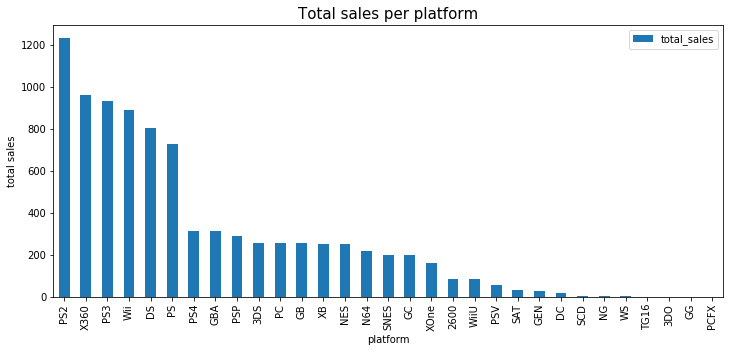

In [27]:
# calculating total sales per platform and plotting a bar graph

df_platform = df.groupby('platform')['total_sales'].agg({'total_sales':'sum'})
df_platform.sort_values(by='total_sales',ascending=False,inplace=True)
plot = df_platform['total_sales'].plot.bar(figsize=(12,5))
plot.set_title('Total sales per platform',fontsize=(15))
plt.ylabel('total sales')
plot.legend();

In [28]:
# checking the numerical statistics of the data

df_platform['total_sales'].describe()

count      31.000000
mean      284.334516
std       343.954144
min         0.030000
25%        22.150000
50%       200.040000
75%       301.205000
max      1233.560000
Name: total_sales, dtype: float64

## Platforms with highest sales:

In [29]:
df_high_plat = df_platform.groupby('platform').head(5)
df_high_plat.head(5)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


In [30]:
# getting the data of platforms with highest sales

df_high_plat_main = df.query('platform == ["DS","PS2","PS3","Wii","X360"]')
df_high_plat_main.reset_index(inplace=True)
df_high_plat_main.drop(columns=['index']).head(10)

,name,sales_per_game,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Frozen: Olaf's Quest,1.10,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,E,0.51
1,Tales of Xillia 2,0.84,PS3,2012,Role-Playing,0.20,0.12,0.45,0.07,71.0,7.9,T,0.84
2,.hack//G.U. Vol.1//Rebirth,0.17,PS2,2006,Role-Playing,0.00,0.00,0.17,0.00,NaN,NaN,T,0.17
3,.hack//G.U. Vol.2//Reminisce,0.23,PS2,2006,Role-Playing,0.11,0.09,0.00,0.03,NaN,NaN,T,0.23
4,.hack//G.U. Vol.2//Reminisce (jp sales),0.16,PS2,2006,Role-Playing,0.00,0.00,0.16,0.00,NaN,NaN,T,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,thinkSMART: Chess for Kids,0.01,DS,2011,Misc,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
8068,uDraw Studio,2.42,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,NaN,E,2.42
8069,uDraw Studio: Instant Artist,0.19,Wii,2011,Misc,0.06,0.09,0.00,0.02,NaN,NaN,E,0.17
8070,uDraw Studio: Instant Artist,0.19,X360,2011,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E,0.02


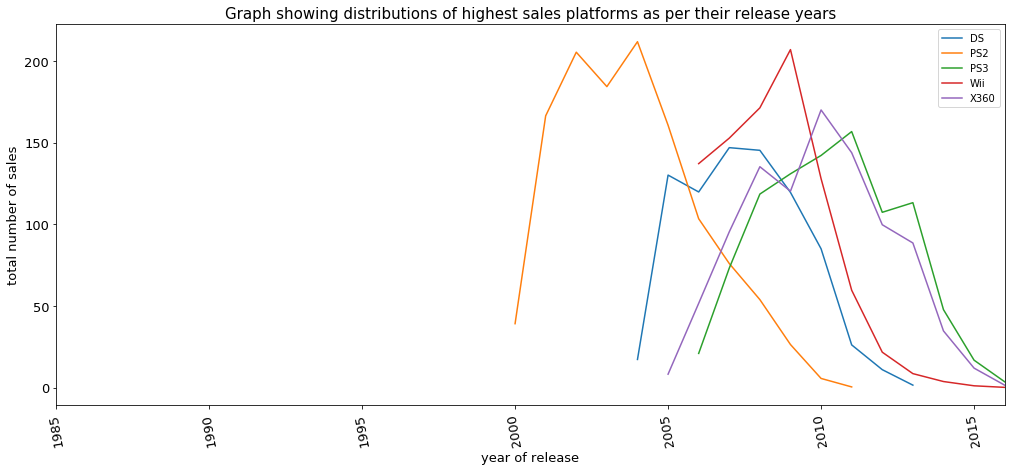

In [31]:
import warnings
warnings.filterwarnings("ignore")

# calculating total sales for each platform per year

df_high_plat_year = df_high_plat_main.groupby(['platform','year_of_release'])['total_sales'].agg({'total_sales':'sum'})
df_high_plat_year.reset_index()

# finding distributions of platform sales based on year of release

plot = df_high_plat_year.pivot_table(
                                     index='year_of_release',
                                     columns='platform',
                                     values='total_sales').plot.line(rot=100,
                                               figsize=(17,7),
                                               fontsize=13)
plot.set_alpha(0.8)
plot.set_title('Graph showing distributions of highest sales platforms as per their release years',fontsize=15)
plot.set_xlabel('year of release',fontsize=13)
plot.legend()
plot.set_ylabel('total number of sales',fontsize=13);

From the above line graphs we can describe the distributions as below:

1. The platforms 'PS2','DS','PS3' and 'X360' represents bimodal distributions.

2.  The platform 'Wii' represents a positively skewed graph there by leading to a skewed distribution.

## Analysing the timeline required for 2017 prognosis:

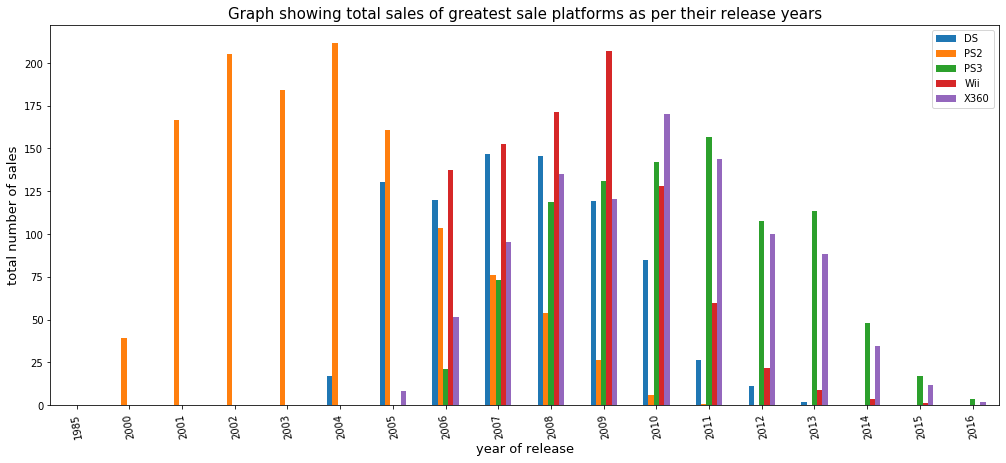

In [32]:
# calculating platforms timelines

plot = df_high_plat_year.pivot_table(
                                     index='year_of_release',
                                     columns='platform',
                                     values='total_sales').plot.bar(rot=100,
                                               figsize=(17,7))
plot.set_alpha(0.8)
plot.set_title('Graph showing total sales of greatest sale platforms as per their release years',fontsize=15)
plot.set_xlabel('year of release',fontsize=13)
plot.legend()
plot.set_ylabel('total number of sales',fontsize=13);

 
1. From the above graph it's clearly evident that the platforms that were once most popular ones don't have sales in 2016 at all  such as'PS2','DS' and 'Wii'.
 
 However, there are very few sales for about less than 5 million USD for the 'PS3' and 'X360' platforms.
 

2. We can notice that the 'PS2'and 'PS3' lasted upto 5-10yrs, where as 'Wii','DS' and 'X360' lasted for 9 to 11 yrs.
 
 By looking at the data we can say that usually the platforms stay upto a time period ranging from about 5 to 11 years.
 
 

 

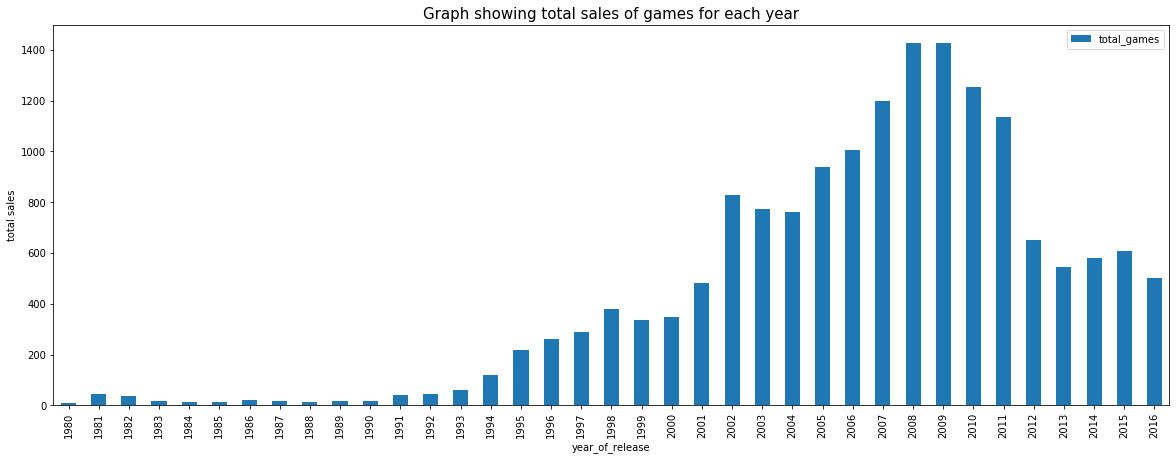

In [33]:
plot = df_year.plot.bar(figsize=(20,7))
plot.set_title('Graph showing total sales of games for each year',fontsize=(15))
plot.set_ylabel('total sales')
plot.legend();

In order to make a prognosis for the market of 2017 we need to look for the most recent data, analyse it and make conclusions. So let us choose a time period of 5 years because in the above observations we saw that platforms stay for a range of 5 to 11 years so let us take it's starting range and only work with the five years data.

## Extracting new dataset and analyzing it :

In [34]:
# Getting data for years greater than 2011

df_latest = df.query('year_of_release > 2011')
df_latest.head(10)

,name,sales_per_game,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Beyblade Burst,0.03,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,T,0.03
1,Fire Emblem Fates,1.67,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,T,1.67
2,Frozen: Olaf's Quest,1.10,3DS,2013,Platform,0.27,0.27,0.00,0.05,NaN,NaN,E,0.59
3,Frozen: Olaf's Quest,1.10,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,E,0.51
4,Haikyu!! Cross Team Match!,0.04,3DS,2016,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,E,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16406,[Prototype 2],1.64,X360,2012,Action,0.48,0.24,0.00,0.07,74.0,7.0,M,0.79
16407,[Prototype 2],1.64,PS3,2012,Action,0.36,0.28,0.00,0.10,79.0,6.8,M,0.74
16408,[Prototype 2],1.64,PC,2012,Action,0.07,0.03,0.00,0.01,76.0,6.4,M,0.11
16420,htoL#NiQ: The Firefly Diary,0.01,PSV,2014,Platform,0.00,0.00,0.01,0.00,58.0,7.7,T,0.01


In [35]:
import warnings
warnings.filterwarnings("ignore")

df_plat_latest = df_latest.groupby(['platform','year_of_release'])['total_sales'].agg({'total_sales':'sum'})
df_plat_latest.reset_index(inplace=True)
df_plat_latest

,platform,year_of_release,total_sales
0,3DS,2012,51.36
1,3DS,2013,56.57
2,3DS,2014,43.76
3,3DS,2015,27.78
4,3DS,2016,15.14
5,DS,2012,11.01
6,DS,2013,1.54
7,PC,2012,23.22
8,PC,2013,12.38
9,PC,2014,13.28


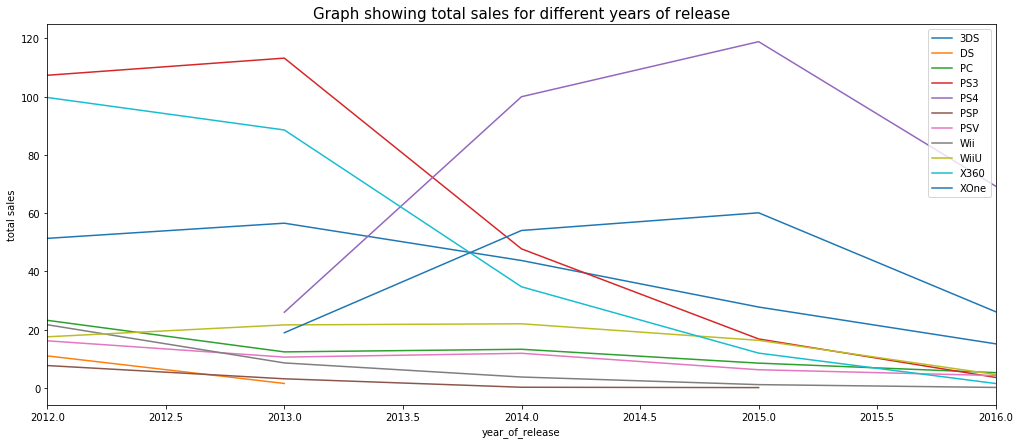

In [36]:
# plotting a graph to check the growth and drop of various platforms

df_plat_sales = df_latest.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum').plot.line(figsize=(17,7))
plt.title('Graph showing total sales for different years of release',fontsize=(15))
plt.ylabel('total sales')
plt.legend();

The above graph represents that the platforms other than PS3 , X360, PS4, Xone and 3DS all other platforms had almost uniform sales till 2016.

We can consider these platform as most profitable platforms. However all of these platforms seems to dropping in 2016 and further.

In [37]:
# to calculate total sales per platform

df_plat_latest_sales = df_latest.pivot_table(index='platform',values='total_sales',aggfunc=({'total_sales':'sum'}))
df_plat_latest_sales.sort_values(by='total_sales',ascending=False,inplace=True)
df_plat_latest_sales

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [38]:
# to determine numerical statistics of total_sales of platforms

df_plat_latest_sales.describe()

,total_sales
count,11.000000
mean,131.502727
std,112.116322
min,11.190000
25%,42.275000
50%,82.190000
75%,215.575000
max,314.140000


In [39]:
# picking the most profitable platforms by cosidering platforms with sales values greater than it's mean

df_high_plat_latest = df_plat_latest_sales.query('total_sales > 130')
df_high_plat_latest.reset_index(inplace=True)
df_high_plat_latest

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


I've used the avaerage value of sales per platform as the criteria to determine the top 5 platforms in the new timeline dataset and obtained the above results.

In [40]:
import warnings
warnings.filterwarnings("ignore")

# calculating total sales of profitable platforms per release year

df_high_plat_latest_year = df_plat_latest.query('platform == ["X360","PS3","3DS","XOne","PS4"]')
df_high_plat_latest_year.reset_index(inplace=True)
df_high_plat_latest_year.drop(columns='index',inplace=True)
df_high_plat_latest_year

,platform,year_of_release,total_sales
0,3DS,2012,51.36
1,3DS,2013,56.57
2,3DS,2014,43.76
3,3DS,2015,27.78
4,3DS,2016,15.14
5,PS3,2012,107.36
6,PS3,2013,113.25
7,PS3,2014,47.76
8,PS3,2015,16.82
9,PS3,2016,3.60


In [41]:
# getting data for most profitable platforms

plat_data = df_latest.query('platform ==["X360","PS3","3DS","XOne","PS4"]')
plat_data.head(10)

,name,sales_per_game,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Beyblade Burst,0.03,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,T,0.03
1,Fire Emblem Fates,1.67,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,T,1.67
2,Frozen: Olaf's Quest,1.10,3DS,2013,Platform,0.27,0.27,0.00,0.05,NaN,NaN,E,0.59
4,Haikyu!! Cross Team Match!,0.04,3DS,2016,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,E,0.04
5,Tales of Xillia 2,0.84,PS3,2012,Role-Playing,0.20,0.12,0.45,0.07,71.0,7.9,T,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16402,Zumba Fitness: World Party,0.47,XOne,2013,Misc,0.17,0.05,0.00,0.02,73.0,6.2,E,0.24
16405,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,0.05,3DS,2013,Action,0.00,0.00,0.05,0.00,NaN,NaN,T,0.05
16406,[Prototype 2],1.64,X360,2012,Action,0.48,0.24,0.00,0.07,74.0,7.0,M,0.79
16407,[Prototype 2],1.64,PS3,2012,Action,0.36,0.28,0.00,0.10,79.0,6.8,M,0.74


In [42]:
x360_data = plat_data.query('platform ==["X360"]')
x360_data.head(10)

,name,sales_per_game,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
63,2 in 1 Combo Pack: Sonic Heroes / Super Monkey...,0.64,X360,2013,Misc,0.09,0.01,0.00,0.01,NaN,NaN,E,0.11
73,2014 FIFA World Cup Brazil,1.04,X360,2014,Sports,0.15,0.25,0.00,0.03,74.0,4.4,E,0.43
224,Adventure Time: Explore the Dungeon Because I ...,0.29,X360,2013,Action,0.03,0.04,0.00,0.01,NaN,NaN,T,0.08
230,Adventure Time: Finn & Jake Investigations,0.46,X360,2015,Action,0.03,0.05,0.00,0.01,NaN,NaN,T,0.09
234,Adventure Time: The Secret of the Nameless,0.02,X360,2014,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16373,Zone of the Enders HD Collection,0.62,X360,2012,Simulation,0.14,0.03,0.01,0.02,75.0,8.8,M,0.20
16383,Zoo Tycoon (2013),0.45,X360,2013,Simulation,0.02,0.06,0.00,0.01,NaN,NaN,E,0.09
16400,Zumba Fitness Core,0.12,X360,2012,Misc,0.00,0.05,0.00,0.00,77.0,6.7,E10+,0.05
16401,Zumba Fitness Rush,0.18,X360,2012,Sports,0.00,0.16,0.00,0.02,73.0,6.2,E10+,0.18


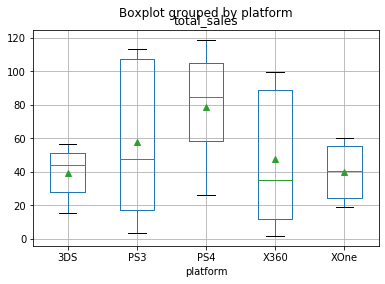

In [43]:
import warnings
warnings.filterwarnings("ignore")

# plotting boxplot for global sales per platform

df_high_plat_latest_year.boxplot(column =['total_sales'],by='platform',showmeans=True)


From the above boxplot we can say that there is a litle bit difference in the golabl sales of these platforms, here the total sales vary from almost 15 million USD to 105 million USD.

## Analysis based on reviews:

In [44]:
# to calculate the average sales of each platform

high_plat_sales_mean = df_high_plat_latest_year.pivot_table(index='platform',values='total_sales')
high_plat_sales_mean


,total_sales
platform,
3DS,38.922
PS3,57.758
PS4,78.535
X360,47.308
XOne,39.830


In [45]:
x360_data.isna().sum()

name                 0
sales_per_game       0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       121
user_score          57
rating               0
total_sales          0
dtype: int64

In [46]:
ps3_data = plat_data.query('platform ==["PS3"]')
ps3_data.isna().sum()

name                 0
sales_per_game       0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       279
user_score         210
rating               0
total_sales          0
dtype: int64

In [47]:
ds3_data = plat_data.query('platform ==["3DS"]')
ds3_data.isna().sum()

name                 0
sales_per_game       0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       292
user_score         282
rating               0
total_sales          0
dtype: int64

In [48]:
ps4_data = plat_data.query('platform ==["PS4"]')
ps4_data.isna().sum()

name                 0
sales_per_game       0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       140
user_score         135
rating               0
total_sales          0
dtype: int64

In [49]:
xone_data = plat_data.query('platform ==["XOne"]')
xone_data.isna().sum()

name                0
sales_per_game      0
platform            0
year_of_release     0
genre               0
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
critic_score       78
user_score         65
rating              0
total_sales         0
dtype: int64

Correlation between sales and critic score is 0.4169983280084019


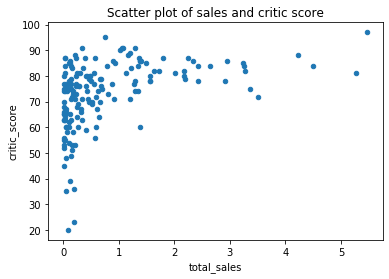

In [50]:
# plotting scatter plot for critic score and sales of 'xOne' platform

graph = xone_data.plot(x='total_sales',y='critic_score',kind='scatter') #to draw a scatterplot between the parameters
graph.set_title('Scatter plot of sales and critic score' )
print('Correlation between sales and critic score is', (xone_data['total_sales']).corr(xone_data['critic_score']))

Here we can see that the correlation between  critic score and sales is approximately 0.4 which indicates that as the critic score increases the number of sales also increases .

From the scatter plot we can observe the same thing the higher the score given by the critics is more likely to be preferred by the consumers.

Correlation between sales and user score is -0.06892505328279423


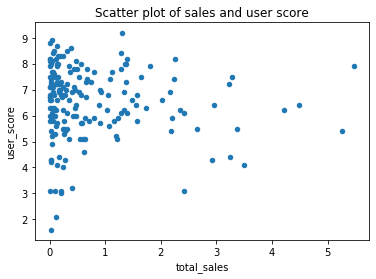

In [51]:
# plotting scatter plot for user score and sales of 'xOne' platform

graph = xone_data.plot(x='total_sales',y='user_score',kind='scatter') #to draw a scatterplot between the parameters
graph.set_title('Scatter plot of sales and user score' )
print('Correlation between sales and user score is', (xone_data['total_sales']).corr(xone_data['user_score']))

Here the correlation factor is -0.06 as the negative value is very less we can assume that the userscore doesn't really effect much the sales of the games that may be due to the users all time aren't verified, the rating can sometimes be manipulated by external sources.

In [52]:
xone_games = xone_data['name'].unique()
len(xone_games)

247

The total number of games released by the 'XOne' platform are 247. Now let us check how many of these games are present on other platforms and note thier sales accordingly.

In [53]:
# to check the sales of 'Xone_games' on other platforms

games_in_plats = plat_data['name'].isin(xone_games)
plats_new = plat_data[games_in_plats]
plats_new.head(10)

,name,sales_per_game,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
109,7 Days to Die,0.19,PS4,2016,Action,0.04,0.08,0.0,0.02,45.0,5.9,M,0.14
110,7 Days to Die,0.19,XOne,2016,Action,0.03,0.02,0.0,0.00,35.0,5.2,M,0.05
227,Adventure Time: Finn & Jake Investigations,0.46,PS4,2015,Action,0.03,0.05,0.0,0.02,NaN,NaN,T,0.10
228,Adventure Time: Finn & Jake Investigations,0.46,PS3,2015,Action,0.02,0.05,0.0,0.01,NaN,NaN,T,0.08
229,Adventure Time: Finn & Jake Investigations,0.46,3DS,2015,Action,0.03,0.05,0.0,0.01,NaN,NaN,T,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16368,Zombie Army Trilogy,0.31,PS4,2015,Shooter,0.05,0.12,0.0,0.03,62.0,6.8,M,0.20
16369,Zombie Army Trilogy,0.31,XOne,2015,Shooter,0.05,0.05,0.0,0.01,62.0,7.2,M,0.11
16382,Zoo Tycoon (2013),0.45,XOne,2013,Simulation,0.18,0.15,0.0,0.03,NaN,NaN,E,0.36
16383,Zoo Tycoon (2013),0.45,X360,2013,Simulation,0.02,0.06,0.0,0.01,NaN,NaN,E,0.09


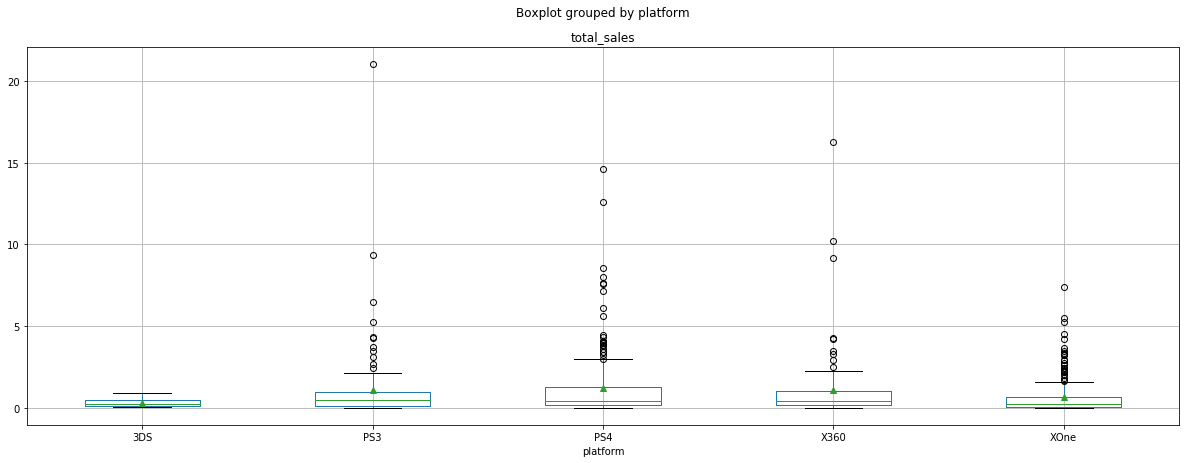

<Figure size 1440x360 with 0 Axes>

In [54]:
# plotting a boxplot showing sales of 'XOne' gameson other platforms

plats_new.boxplot(column=['total_sales'],by='platform',showmeans=True,figsize=(20,7))
plt.figure(figsize=(20,5));

From the above graph we can see that global sales of the games that are on the 'XOne' platform have  less sales when compared to the other platforms like 'PS3', 'PS4' and 'X360', however '3DS' platform has fewer sales of these games on their platform.

## Analyzing based on Genres :

In [55]:
# making pivot table from the new dataset to calculate total number of sales and games for each genre

df_latest_genre = df_latest.pivot_table(index='genre',values=['total_sales','name'],aggfunc={'total_sales':'sum','name':'count'})
df_latest_genre.sort_values(by=['name','total_sales'],ascending=False,inplace=True)
df_latest_genre.rename(columns={'name':'total_games'},inplace=True)
df_latest_genre

,total_games,total_sales
genre,,
Action,1031,441.12
Role-Playing,370,192.80
Adventure,302,29.43
Sports,268,181.07
Shooter,235,304.73
Misc,192,85.04
Racing,115,53.50
Fighting,109,44.49
Platform,85,61.00


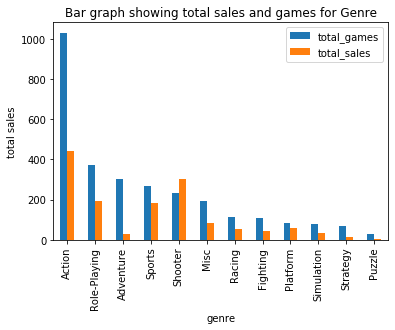

In [56]:
# plotting a bar graph showing total games and total sales for each genre

df_latest_genre.plot.bar()
plt.title('Bar graph showing total sales and games for Genre')
plt.ylabel('total sales')
plt.legend();

I think when comparing the global sales and type of genre we need to take into consideration the total number of games too! Because we can see that highest number of games are for Action genre i.e., more than 1000 but the sales are almost half of it. 

Where as the Shooter genre has less number of games but the number of sales are signoificantly higher.

Therefore, I think genres cannot be classified as more profitable or less profitable just on the total number of sales.

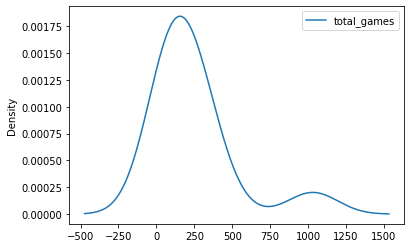

In [57]:
# plotting a density plot to determine the distribution of games for genre

df_latest_genre_games = df_latest.pivot_table(index='genre',values='name',aggfunc='count')
df_latest_genre_games = df_latest_genre_games.rename(columns={'name':'total_games'})
df_latest_genre_games.plot.density();

The distribution of total number of games for each genre has a bimodal distribution as it has two peaks. 

# . Creating a user profile for each region :

In [58]:
# creating pivot tables for all the three regions to calculate their corresponding regional sales per platform

na_platform = df_latest.pivot_table(index='platform',values='na_sales',aggfunc='sum')
na_platform.reset_index(inplace=True)
eu_platform = df_latest.pivot_table(index='platform',values='eu_sales',aggfunc='sum')
eu_platform.reset_index(inplace=True)
jp_platform = df_latest.pivot_table(index='platform',values='jp_sales',aggfunc='sum')
jp_platform.reset_index(inplace=True)

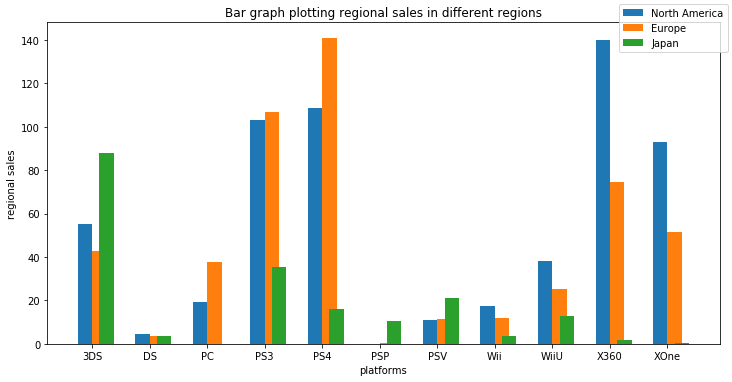

In [59]:
# plotting a bar graph representing regional sales per platform over different regions

x = np.arange(len(na_platform['platform']))
width=0.25
fig, ax = plt.subplots(figsize=(10,5))
r1 = ax.bar(x - width/2, na_platform['na_sales'], width, label='North America')
r2 = ax.bar(x + width/2, eu_platform['eu_sales'], width, label='Europe')
r3 = ax.bar(x + width, jp_platform['jp_sales'], width, label='Japan')
fig.legend()
fig.tight_layout()
ax.set_ylabel('regional sales')
ax.set_xlabel('platforms')
ax.set_title('Bar graph plotting regional sales in different regions')
ax.set_xticks(x)
ax.set_xticklabels(na_platform['platform']);

From the above graph we can see that  the following platforms were most profitable in corresponding regions:

1. North America - 'X360', 'XOne', 'PS4', 'PS3' and '3DS' 
2. Europe - 'PS4', 'PS3, '3DS', 'X360', 'XOne'
3. Japan - 'PS3, '3DS', 'PSV', ' WiiU' and 'PS4'

We can see that there we very few sales in Japan when compared to other two regions which was followed by Europe, there by making highest sales in North America.

The most common profitable platforms among all the three regions are 'PS3', 'PS4' and '3DS'.

In [60]:
# creating pivot tables for all the three regions to calculate their corresponding regional sales per genre

na_genre = df_latest.pivot_table(index='genre',values='na_sales',aggfunc='sum')
na_genre.reset_index(inplace=True)
eu_genre = df_latest.pivot_table(index='genre',values='eu_sales',aggfunc='sum')
eu_genre.reset_index(inplace=True)
jp_genre = df_latest.pivot_table(index='genre',values='jp_sales',aggfunc='sum')
jp_genre.reset_index(inplace=True)

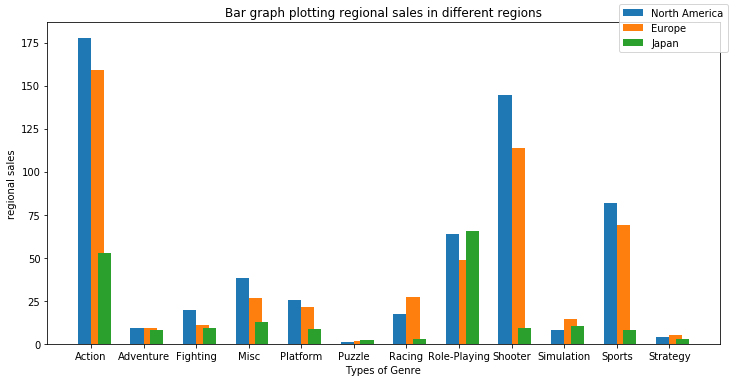

In [61]:
# plotting a bar graph representing regional sales per genre over different regions

x = np.arange(len(na_genre['genre']))
width=0.25
fig, ax = plt.subplots(figsize=(10,5))
r1 = ax.bar(x - width/2, na_genre['na_sales'], width, label='North America')
r2 = ax.bar(x + width/2, eu_genre['eu_sales'], width, label='Europe')
r3 = ax.bar(x + width, jp_genre['jp_sales'], width, label='Japan')
fig.legend()
fig.tight_layout()
ax.set_ylabel('regional sales')
ax.set_xlabel('Types of Genre')
ax.set_title('Bar graph plotting regional sales in different regions')
ax.set_xticks(x)
ax.set_xticklabels(na_genre['genre']);

From the above graph we can see that  the following genres were most popular in their corresponding regions:

1. North America - Action, Shooter, Sports, Role-playing, Misc
2. Europe - Action, Shooter, Sports, Role-playing, Racing
3. Japan - Role-playing, Action, Misc, Simulation, Shooter

We can see that there we very few sales in Japan when compared to other two regions which was followed by Europe, there by making highest sales in North America except for few genres like adventure, puyyle, racing, simulation and strategy.

The top genres among all the three regions are Action, Shooter, Sports, Role-playing.

In [62]:
# creating pivot tables for all the three regions to calculate their corresponding regional sales for different ratings

na_rating = df_latest.pivot_table(index='rating',values='na_sales',aggfunc='sum')
na_rating.reset_index(inplace=True)
eu_rating = df_latest.pivot_table(index='rating',values='eu_sales',aggfunc='sum')
eu_rating.reset_index(inplace=True)
jp_rating = df_latest.pivot_table(index='rating',values='jp_sales',aggfunc='sum')
jp_rating.reset_index(inplace=True)

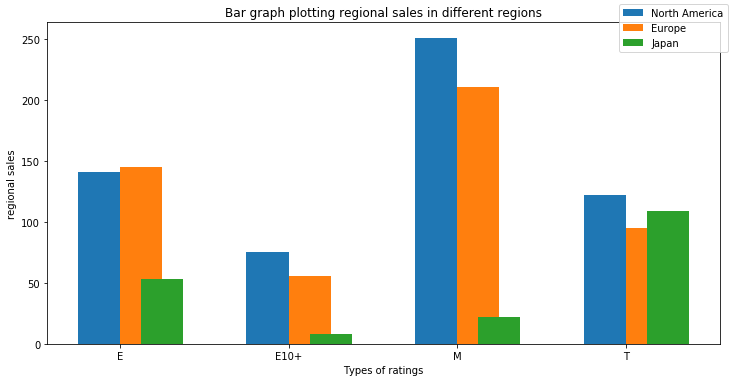

In [63]:
# plotting a bar graph representing regional sales over different regions for different ratings

x = np.arange(len(na_rating['rating']))
width=0.25
fig, ax = plt.subplots(figsize=(10,5))
r1 = ax.bar(x - width/2, na_rating['na_sales'], width, label='North America')
r2 = ax.bar(x + width/2, eu_rating['eu_sales'], width, label='Europe')
r3 = ax.bar(x + width, jp_rating['jp_sales'], width, label='Japan')
fig.legend()
fig.tight_layout()
ax.set_ylabel('regional sales')
ax.set_xlabel('Types of ratings')
ax.set_title('Bar graph plotting regional sales in different regions')
ax.set_xticks(x)
ax.set_xticklabels(na_rating['rating']);


We can see that there we very few sales in Japan when compared to other two regions which was followed by Europe, there by making highest sales in North America.

The top ratings among all the three regions are 'M', 'E' which represent Mature and Everyone. This shows that rating definitely do have impact on sales of games . Here E10+ has been given for much older games in old times so most people don't prefer it, where games having rating as Mature and Everyone which probably everyone can play and counts on majority of people therefore their sales are high in a ll regions.

# . Testing the hypothesis :

## Hypothesis I

Lets assume that the given hypothesis 'Average user ratings of the Xbox One and PC platforms are the same' is the Null hypothesis and it's Alternative Hypothesis would be 'Average user ratings of the Xbox One and PC platforms are not same'.

In [64]:
from scipy import stats
from scipy.stats import shapiro

#to check the normality of the distribution

xone= df_latest[df_latest['platform']=='XOne']['user_score'].dropna()
pc = df_latest[df_latest['platform']=='PC']['user_score'].dropna()

# Shapiro-Wilk Test for Xbox One
stat, p = shapiro(xone)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.955, p=0.000
Sample does not look Gaussian (reject H0)


In [65]:
# Shapiro-Wilk Test for PC
stat, p = shapiro(pc)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.938, p=0.000
Sample does not look Gaussian (reject H0)


In [66]:
# checking for variance

stats.levene(xone, pc)

LeveneResult(statistic=6.295287176069245, pvalue=0.01251484281850554)

Here pvalue is less than the level of significance i.e., 0.05, so the sample groups do not have equal variance.

In [67]:
from scipy import stats as st

alpha = 0.05 

# conducting welch' correction unpaired ttest 

results = st.ttest_ind(xone,pc,equal_var=False)
print('p-value:',results.pvalue)
if (results.pvalue<alpha):# your code: compare the p-value you get with the significance level):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 0.5489537965134987
We can't reject the null hypothesis


Here I decided to conduct a 't' test as we need to check for the equality of two means by passing the two arrays whose means are to be tested as we are checking the null hypothesis and the average values are supposed to be equal.

As a result of the test we can see that the p-value is much higher than the level of significance, which makes us decide that there is high scope that we certainly can't reject the null hypothesis.

## Hypothesis II

Lets assume that the given hypothesis 'Average user ratings for the Action and Sports genres are different' is the Null Hypothesis and it's Alternative Hypothesis would be 'Average user ratings for the Action and Sports genres are the same'.

In [68]:
from scipy import stats
from scipy.stats import shapiro

#to check the normality of the distribution

action = df_latest[df_latest['genre']=='Action']['user_score'].dropna()
sports = df_latest[df_latest['genre']=='Sports']['user_score'].dropna()

# Shapiro-Wilk Test for 'Action'

stat, p = shapiro(action)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.912, p=0.000
Sample does not look Gaussian (reject H0)


In [69]:
# Shapiro-Wilk Test for 'Sports'
stat, p = shapiro(sports)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.969, p=0.000
Sample does not look Gaussian (reject H0)


In [70]:
# chek
stats.levene(action, sports)

LeveneResult(statistic=19.259864452764166, pvalue=1.3125789036876737e-05)

Here pvalue is greater than the level of significance i.e., 0.05, so the sample groups have equal variance.

In [71]:
from scipy import stats as st

alpha = 0.05 


# conducting ttest 
results = st.ttest_ind(action,sports)
print('p-value:',results.pvalue)
if (results.pvalue<alpha):# your code: compare the p-value you get with the significance level):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 3.7163089460934874e-26
We reject the null hypothesis


Here I decided to conduct a 't' test as we need to check for the equality of two means by passing the two arrays whose means are to be tested and has set the equal variance parameter to 'False' as we are checking the null hypothesis and the average values are not supposed to be equal.

As a result of the test we can see that the p-value is less than the level of significance, which makes us decide that there is high scope that we certainly reject the null hypothesis.

# . Overall Conclusion:

From all the above analysis we've seen before has played a vital role in gathering the following conclusions:

1. The total number of games being sold in 20th century are far more higher than the numbewr of games that we being sold in late 1980's,  this may be due to the developing modern technology that makes these games more and more interactive and interesting.

2. We can see that since since 1980 the most profitable platforms were "DS","PS","PS2","PS3","Wii","X360" which had the sales of more than 350 million USD on an average.

3. The most popular platforms don't always stay for long some of them stay for 5 years where as few platforms may stay in the market selling certain games for almost 11 years.

4. This might be the main reason for the platforms to make higher revenues as they have occupied major period of time in the businesss market.

5. In order to make an effective analysis for 2017 it's better to consider most recent data that may be for about 5 years and there we can observe that the platforms like "X360","PS3","3DS","XOne","PS4" were the most popular ones.

6. The platforms like "X360" and "PS3" have been standing strong in the business even till 2016.

7. From the scatter plots drawn before it was clearly evident that reviews have a great impact on the preferences of video games to be bought by the users.

8. The video game sales in North America are much more higher than the sales in Europe and Japan.

Finally, in my view the the online store should focus much on the hot selling platforms like 'XBox 360' and 'PS3' platforms and mainly focus on games with genres like Action, Shooter etc more kind of interactive games and that can be played by everyone.

